# **SELECCIÓN DE ATRIBUTOS - JUGADORES DE FIFA**

# 1. CARGA DE LOS DATOS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (3).xlsx


In [0]:
import pandas as pd
import io
Jugadores_DF = pd.read_excel(io.BytesIO(uploaded['data.xlsx']), encoding= 'unicode_escape')

In [0]:
VarNum = ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  
           'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions','HeadingAccuracy','Curve',
           'Jumping','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']
VarCat = ['Preferred Foot','Position','Nationality','Club']

In [0]:
#SELECCIÓN DE CARACTERISITCAS A TENER EN CUENTA EN EL ESTUDIO.
Jugadores_DF = Jugadores_DF[VarNum+VarCat]

In [8]:
Jugadores_DF.head()

,Overall,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Preferred Foot,Position,Nationality,Club
0,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,Left,RF,Argentina,FC Barcelona
1,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,Right,ST,Portugal,Juventus
2,92,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,Right,LW,Brazil,Paris Saint-Germain
3,91,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,Right,GK,Spain,Manchester United
4,91,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,Right,RCM,Belgium,Manchester City


In [9]:
Jugadores_DF.shape

(18207, 34)

# 2. ANALISIS DESCRIPTIVO DE LOS DATOS

In [10]:
Jugadores_DF.describe()

,Overall,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18207.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.00000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,66.238699,49.743202,45.562848,58.693288,55.378413,52.717721,58.381777,64.614252,64.728862,63.499145,63.219238,42.921240,42.868512,61.840329,63.960730,55.47052,65.321052,47.122111,55.872649,46.696762,52.305002,47.180685,65.086868,49.967349,53.407424,48.560807,58.658541,47.276212,47.697149,45.660030
std,6.908930,18.365938,19.523393,14.697523,18.911372,15.328938,16.682297,14.927917,14.652374,14.761780,15.897020,17.695671,17.477437,9.009527,14.132128,17.23359,12.549925,19.255529,17.371631,20.700188,17.380495,18.396554,11.820062,19.527141,14.145761,15.706617,11.432878,19.909676,21.670806,21.296616
min,46.000000,5.000000,2.000000,7.000000,4.000000,9.000000,5.000000,12.000000,12.000000,14.000000,12.000000,4.000000,3.000000,21.000000,16.000000,2.00000,17.000000,3.000000,11.000000,3.000000,4.000000,6.000000,15.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,62.000000,38.000000,30.000000,54.000000,49.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,30.000000,31.000000,56.000000,56.000000,45.00000,58.000000,33.000000,44.000000,26.000000,45.000000,34.000000,58.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,66.000000,54.000000,49.000000,62.000000,61.000000,56.000000,63.000000,67.000000,67.000000,66.000000,66.000000,44.000000,41.000000,62.000000,66.000000,59.00000,67.000000,51.000000,59.000000,52.000000,56.000000,48.000000,66.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,71.000000,64.000000,62.000000,68.000000,68.000000,64.000000,69.000000,75.000000,75.000000,74.000000,74.000000,57.000000,57.000000,68.000000,74.000000,68.00000,74.000000,62.000000,69.000000,64.000000,64.000000,62.000000,73.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,94.000000,93.000000,95.000000,93.000000,97.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,90.000000,94.000000,96.000000,96.000000,95.00000,97.000000,94.000000,95.000000,92.000000,94.000000,94.000000,95.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


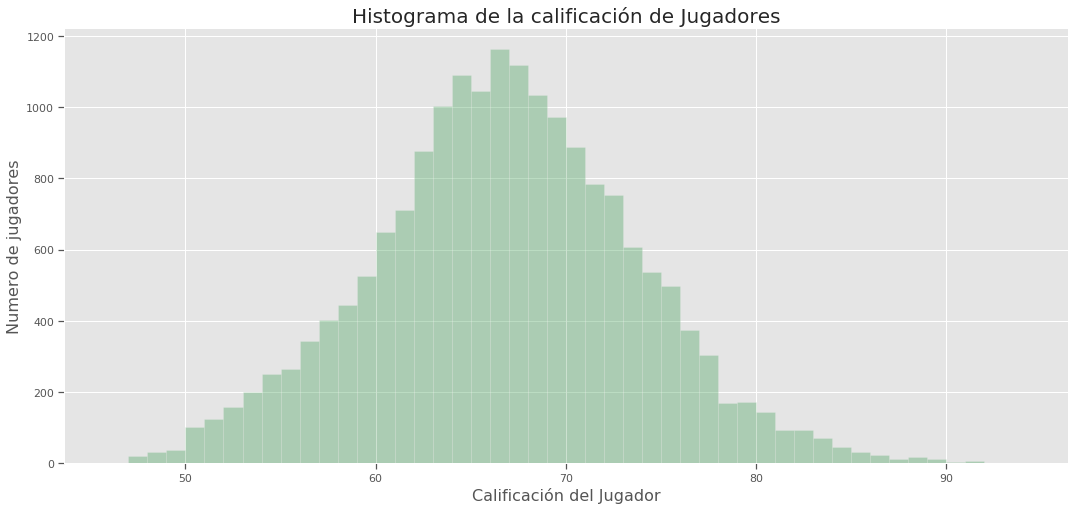

In [11]:
sns.set(style = "ticks", palette = "deep", color_codes = True)
Valx = Jugadores_DF.Overall
maximo = max(Valx)
minimo = min(Valx)
plt.figure(figsize = (18,8))
plt.style.use('ggplot')

ax = sns.distplot(Valx, bins = maximo-minimo, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Calificación del Jugador", fontsize = 16)
ax.set_ylabel(ylabel = 'Numero de jugadores', fontsize = 16)
ax.set_title(label = 'Histograma de la calificación de Jugadores', fontsize = 20)
plt.show()

In [12]:
Jugadores_DF["Overall"].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [13]:
from scipy import stats
stats.percentileofscore(Jugadores_DF["Overall"], 75)

90.0093370681606

PEND: SERIA BUENO AGREGAR COMO SON LOS ESTADISTICOS DE LOS MEJORES JUGADORES. ADCIONAL.


# 3.CORRELACIÓN DE PEARSON - VARIABLES CUANTITATIVAS

---



In [0]:
Jugadores_DF2 = Jugadores_DF[VarNum]

In [0]:
Pearson_DF2 = Jugadores_DF2
#Covertimos el dataframe para que las variables categoricas sean analizadas como variables binarias.
Caracteristicas2 = Pearson_DF2.columns #Encabezados de cada columna
Pearson_DF2 = Pearson_DF2.dropna() #Quita el registro en caso de que haya aunque sea un NA (Valores con Cero) -- VERIFICAR SI LO DEJAMOS!!!!

In [0]:
Pearson_DF2 = pd.DataFrame(Pearson_DF2,columns=Caracteristicas2)

In [17]:
Pearson_DF2.head()

,Overall,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,91,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,91,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [0]:
X2 = Pearson_DF2.copy()
del X2['Overall'] #Quitamos la calificación general para contar con solo las variables X.

In [0]:
y2 = Pearson_DF2['Overall']
maximo2 = max(y2)
minimo2 = min(y2)
t = 0
ycont_list2 = []
for i in y2:
  ResultadoContinuo2=(i - minimo2)/(maximo2-minimo2)
  ycont_list2.append(ResultadoContinuo2)
#print(ycont_list2)

In [0]:
Nombre_Caract2 = list(X2.columns)
Numero_Caract2=29  

In [21]:
def cor_selector2(X2, y2,Numero_Caract2):
    cor_list2 = []
    Nombre_Caract2 = X2.columns.tolist()
    # CALCULAR LA CORRRELACIÓN DE "Y" PARA CADA CARACTERISTICA
    for i in X2.columns.tolist(): 
        cor2 = np.corrcoef(X2[i], y2)[0, 1] # CORR DE PEARSON DE LA VARIABLE IND "X" CON LA VARIABLE DEPEND "Y". [0,1] ES PARA QUE LA RTA SEA EN VALOR Y NO EN MATRIZ.
        cor_list2.append(cor2) #ALMACENA LOS RESULTADOS DE CADA CORRELACIÓN EN UNA LISTA
    
    cor_list2 = [0 if np.isnan(i) else i for i in cor_list2] #SI ALGÚN ELEMENTO DE LA LISTA DA "NAN" ENTONCES LO REEMPLAZA CON CERO. 
    cor_Caract_list2 = X2.iloc[:,np.argsort(np.abs(cor_list2))[-Numero_Caract2:]].columns.tolist() #IPAD
    # EVIDENCIAR SI LA CARACTERISTICA QUEDA EN EL TOP - DE ACUERDO CON LA CANTIDAD DE CARACTERISTICAS ELEGIDAS PARA EL MODELO "numero_Caract2"
    cor_Bool2 = [True if i in cor_Caract_list2 else False for i in Nombre_Caract2]
    cor_list2.sort()
    cor_list2=cor_list2[len(cor_list2)-Numero_Caract2:len(cor_list2)]
    #cor_list2.reverse()
    return cor_Bool2, cor_Caract_list2, cor_list2
cor_Bool2, cor_Caract_list2, cor_list2 = cor_selector2(X2, ycont_list2,Numero_Caract2)
print(str(len(cor_Caract_list2)), 'selected features')

29 selected features


In [0]:
TopDF=pd.DataFrame(cor_Caract_list2,cor_list2,columns=['CARACTERISTICA'])

In [23]:
TopDF

,CARACTERISTICA
0.103959,Balance
0.197361,Acceleration
0.211011,SprintSpeed
0.223071,SlidingTackle
0.252711,StandingTackle
0.264926,Jumping
0.266166,Agility
0.287548,Marking
0.321785,Interceptions
0.331798,Finishing


In [24]:
np.corrcoef(X2['LongPassing'], ycont_list2)[0, 1]

0.48392087326791344

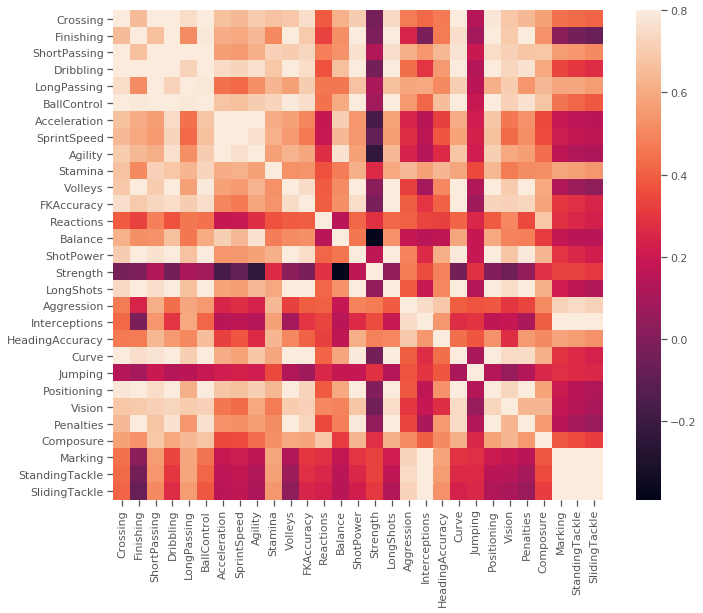

In [25]:
corrmat = X2.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [26]:
corrmat

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Crossing,1.000000,0.655339,0.809774,0.856614,0.756681,0.840941,0.668465,0.645729,0.698750,0.672648,0.690357,0.761275,0.389569,0.618826,0.705625,-0.029855,0.742272,0.473595,0.427736,0.469362,0.833271,0.135515,0.783189,0.685132,0.645676,0.575921,0.443281,0.428920,0.409956
Finishing,0.655339,1.000000,0.661695,0.824395,0.512488,0.788287,0.606599,0.594253,0.644911,0.510967,0.882677,0.697366,0.330983,0.524388,0.815429,-0.010199,0.877838,0.242751,-0.020994,0.473175,0.759051,0.097146,0.888848,0.697143,0.837818,0.533471,0.024323,-0.033376,-0.071989
ShortPassing,0.809774,0.661695,1.000000,0.843810,0.895675,0.911574,0.565700,0.554745,0.613407,0.716685,0.698330,0.736769,0.483195,0.533517,0.771778,0.133400,0.761828,0.611649,0.543470,0.640029,0.775439,0.197281,0.757765,0.713640,0.675878,0.685663,0.559860,0.541078,0.508711
Dribbling,0.856614,0.824395,0.843810,1.000000,0.722503,0.939039,0.748325,0.726980,0.765504,0.686656,0.809722,0.753607,0.369136,0.663437,0.804930,-0.033728,0.843774,0.441176,0.296001,0.550770,0.842733,0.142902,0.896989,0.730286,0.769574,0.598024,0.336240,0.301158,0.274007
LongPassing,0.756681,0.512488,0.895675,0.722503,1.000000,0.788704,0.442486,0.426654,0.523865,0.635673,0.570932,0.703607,0.461633,0.462578,0.671144,0.114055,0.667687,0.590618,0.597091,0.510614,0.710752,0.154335,0.614325,0.698314,0.541986,0.646171,0.587459,0.587548,0.562442
BallControl,0.840941,0.788287,0.911574,0.939039,0.788704,1.000000,0.675939,0.664143,0.705216,0.728830,0.794949,0.759516,0.443593,0.601564,0.831300,0.087383,0.836091,0.549999,0.418592,0.658240,0.829585,0.195234,0.863973,0.718534,0.769658,0.675318,0.453096,0.417517,0.384935
Acceleration,0.668465,0.606599,0.565700,0.748325,0.442486,0.675939,1.000000,0.922148,0.811011,0.607294,0.572208,0.498316,0.188960,0.711627,0.539815,-0.166443,0.580187,0.250193,0.151912,0.329385,0.607400,0.215143,0.682420,0.461617,0.532951,0.348261,0.195070,0.162736,0.157402
SprintSpeed,0.645729,0.594253,0.554745,0.726980,0.426654,0.664143,0.922148,1.000000,0.763720,0.620200,0.557221,0.466815,0.192641,0.643586,0.545111,-0.083069,0.561622,0.278465,0.163904,0.379529,0.578900,0.232411,0.665634,0.429600,0.521163,0.352283,0.212402,0.178056,0.171940
Agility,0.698750,0.644911,0.613407,0.765504,0.523865,0.705216,0.811011,0.763720,1.000000,0.569187,0.625411,0.590508,0.276512,0.770410,0.574946,-0.233761,0.645932,0.241122,0.139019,0.260832,0.682695,0.214719,0.708705,0.597807,0.566639,0.433947,0.167179,0.129363,0.116873
Stamina,0.672648,0.510967,0.716685,0.686656,0.635673,0.728830,0.607294,0.620200,0.569187,1.000000,0.527491,0.537693,0.369789,0.475337,0.616497,0.262506,0.596356,0.645742,0.576272,0.634478,0.590565,0.346229,0.641067,0.472489,0.516329,0.523916,0.587834,0.569895,0.544590


SE DEPURAN LAS VARIABLES CON MAYOR CORRELACIÓN (MAYORES A 0,8)

In [0]:
VarIndep2 = ['Finishing','LongPassing','Acceleration','Stamina','FKAccuracy','Reactions','Balance','Strength','Aggression','HeadingAccuracy','Jumping','Vision','Composure','SlidingTackle']
Xnuevo2 = X2[VarIndep2]

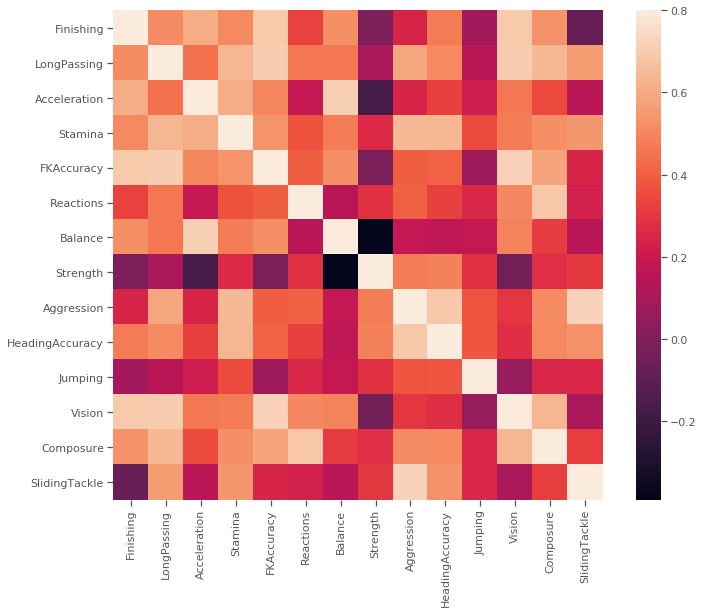

In [28]:
corrmat = Xnuevo2.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
TopDF_80 = TopDF[TopDF.CARACTERISTICA.isin(['Finishing','LongPassing','Acceleration','Stamina','FKAccuracy','Reactions','Balance','Strength','Aggression','HeadingAccuracy','Jumping','Vision','Composure','SlidingTackle'])]

In [30]:
TopDF_80

,CARACTERISTICA
0.103959,Balance
0.197361,Acceleration
0.223071,SlidingTackle
0.264926,Jumping
0.331798,Finishing
0.340681,HeadingAccuracy
0.348565,Strength
0.365965,Stamina
0.395513,Aggression
0.396678,FKAccuracy


SE DEPURAN LAS VARIABLES CON MAYOR CORRELACIÓN (MAYORES A 0,7).

In [0]:
VarIndep = ['Finishing','Stamina','Reactions','Balance','Strength','HeadingAccuracy','Jumping','Composure','SlidingTackle']
Xnuevo = X2[VarIndep]


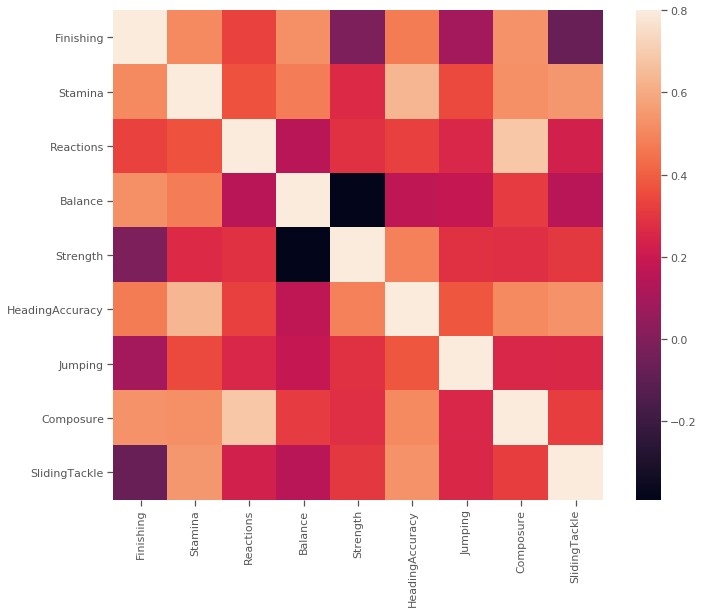

In [32]:
corrmat = Xnuevo.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
TopDF_70 = TopDF[TopDF.CARACTERISTICA.isin(['Finishing','Stamina','Reactions','Balance','Strength','HeadingAccuracy','Jumping','Composure','SlidingTackle'])]

In [34]:
TopDF_70

,CARACTERISTICA
0.103959,Balance
0.223071,SlidingTackle
0.264926,Jumping
0.331798,Finishing
0.340681,HeadingAccuracy
0.348565,Strength
0.365965,Stamina
0.727225,Composure
0.850253,Reactions


## ANALISIS VARIABLES CUALITATIVAS

### ELIMINACIÓN RECURSIVA DE ATRIBUTOS (RFE)

In [0]:
Jugadores_DF_CUAL = Jugadores_DF[VarNum+VarCat]

In [36]:
Jugadores_DF_CUAL = Jugadores_DF_CUAL.dropna()
Jugadores_DF_CUAL.head()

,Overall,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Volleys,FKAccuracy,Reactions,Balance,ShotPower,Strength,LongShots,Aggression,Interceptions,HeadingAccuracy,Curve,Jumping,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Preferred Foot,Position,Nationality,Club
0,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,86.0,94.0,95.0,95.0,85.0,59.0,94.0,48.0,22.0,70.0,93.0,68.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,Left,RF,Argentina,FC Barcelona
1,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,87.0,76.0,96.0,70.0,95.0,79.0,93.0,63.0,29.0,89.0,81.0,95.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,Right,ST,Portugal,Juventus
2,92,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,84.0,87.0,94.0,84.0,80.0,49.0,82.0,56.0,36.0,62.0,88.0,61.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,Right,LW,Brazil,Paris Saint-Germain
3,91,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,13.0,19.0,90.0,43.0,31.0,64.0,12.0,38.0,30.0,21.0,21.0,67.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,Right,GK,Spain,Manchester United
4,91,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,82.0,83.0,91.0,77.0,91.0,75.0,91.0,76.0,61.0,55.0,85.0,63.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,Right,RCM,Belgium,Manchester City


In [37]:
Jugadores_DF_CUAL.shape

(17890, 34)

In [38]:
y3 = Jugadores_DF_CUAL['Overall']>=75 # SE SEGMENTARAN COMO JUGADORES DE MEJOR DESEMPEÑO LOS JUGADORES MAYORES A 80
y3.head()

0    True
1    True
2    True
3    True
4    True
Name: Overall, dtype: bool

In [40]:
Jugadores_DF_CUAL = pd.get_dummies(Jugadores_DF_CUAL[VarCat])
Jugadores_DF_CUAL.shape

(17890, 842)

In [41]:
Jugadores_DF_CUAL

,Preferred Foot_Left,Preferred Foot_Right,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,...,Club_Vendsyssel FF,Club_Venezia FC,Club_VfB Stuttgart,Club_VfL Bochum 1848,Club_VfL Osnabrck,Club_VfL Sportfreunde Lotte,Club_VfL Wolfsburg,Club_VfR Aalen,Club_Viktoria Plze?,Club_Villarreal CF,Club_Vissel Kobe,Club_Vitesse,Club_Vit¢ria,Club_Vit¢ria GuimarÆes,Club_Vit¢ria de Set£bal,Club_V‚lez Sarsfield,Club_V†lerenga Fotball,Club_Waasland-Beveren,Club_Walsall,Club_Waterford FC,Club_Watford,Club_Wellington Phoenix,Club_West Bromwich Albion,Club_West Ham United,Club_Western Sydney Wanderers,Club_Wigan Athletic,Club_Willem II,Club_Wis?a Krak¢w,Club_Wis?a P?ock,Club_Wolfsberger AC,Club_Wolverhampton Wanderers,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zag??bie Lubin,Club_Zag??bie Sosnowiec,Club_€aykur Rizespor,Club_™rebro SK,Club_™stersunds FK
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18203,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18204,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
Numero_Caract3=20
RFE_Selec = RFE(estimator=LogisticRegression(), n_features_to_select=Numero_Caract3, step=10, verbose=1)
RFE_Selec.fit(Jugadores_DF_CUAL, y3)

Fitting estimator with 842 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 832 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 822 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 812 features.
Fitting estimator with 802 features.
Fitting estimator with 792 features.
Fitting estimator with 782 features.
Fitting estimator with 772 features.
Fitting estimator with 762 features.
Fitting estimator with 752 features.
Fitting estimator with 742 features.
Fitting estimator with 732 features.
Fitting estimator with 722 features.
Fitting estimator with 712 features.
Fitting estimator with 702 features.
Fitting estimator with 692 features.
Fitting estimator with 682 features.
Fitting estimator with 672 features.
Fitting estimator with 662 features.
Fitting estimator with 652 features.
Fitting estimator with 642 features.
Fitting estimator with 632 features.
Fitting estimator with 622 features.
Fitting estimator with 612 features.
Fitting estimator with 602 features.
Fitting estimator with 592 features.
Fitting estimator with 582 features.
Fitting estimator with 572 features.
Fitting estimator with 562 features.
Fitting estimator with 552 features.
F

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=10, verbose=1)

In [0]:
RFE_Bool = RFE_Selec.get_support()
RFE_Caract = Jugadores_DF_CUAL.loc[:,RFE_Bool].columns.tolist()

In [44]:
RFE_Caract

['Club_Bayer 04 Leverkusen',
 'Club_Borussia Dortmund',
 'Club_Chelsea',
 'Club_FC Bayern M\x81nchen',
 'Club_Inter',
 'Club_Juventus',
 'Club_Lazio',
 'Club_Liverpool',
 'Club_Manchester United',
 'Club_Milan',
 'Club_Napoli',
 'Club_Paris Saint-Germain',
 'Club_Real Betis',
 'Club_Real Madrid',
 'Club_Roma',
 'Club_SL Benfica',
 'Club_Sevilla FC',
 'Club_Sporting CP',
 'Club_Tottenham Hotspur',
 'Club_West Ham United']